In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics

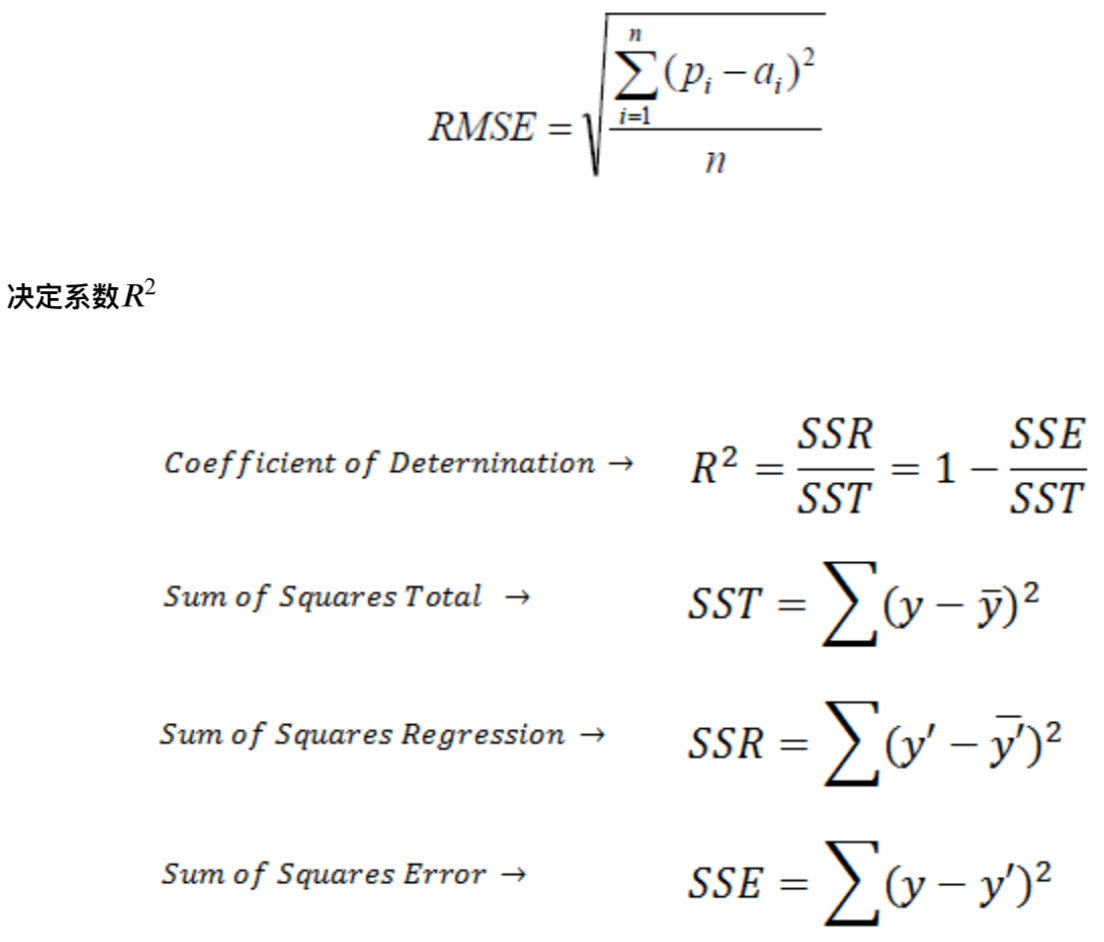

## Import data and data cleaning

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.drop(['ocean_proximity'], axis = 1, inplace = True)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [7]:
data.dropna(axis= 0, inplace = True)

In [8]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

## Data visualization
##### Color map -Direct Visualization

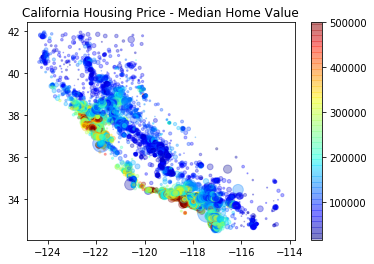

In [9]:
plt.scatter(data['longitude'], data['latitude'], s =data['population']/100,
            alpha = 0.3, c= data['median_house_value'], cmap = plt.get_cmap('jet'))
plt.title('California Housing Price - Median Home Value')
plt.colorbar()
plt.show()

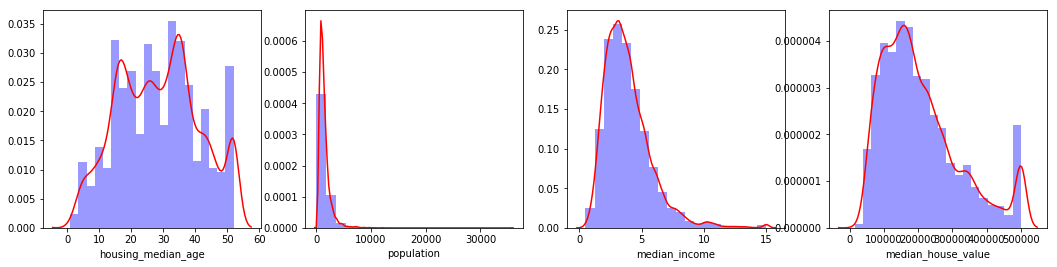

In [12]:
feature = ['housing_median_age', 'population','median_income', 'median_house_value']
index =0
plt.figure(figsize=(18,4))
for fea in feature:
    index += 1
    plt.subplot(1,4,index)
    plt.xlabel(fea)
    sns.distplot(data[fea], kde=True,bins=20,color='b',kde_kws={'color': 'r'})

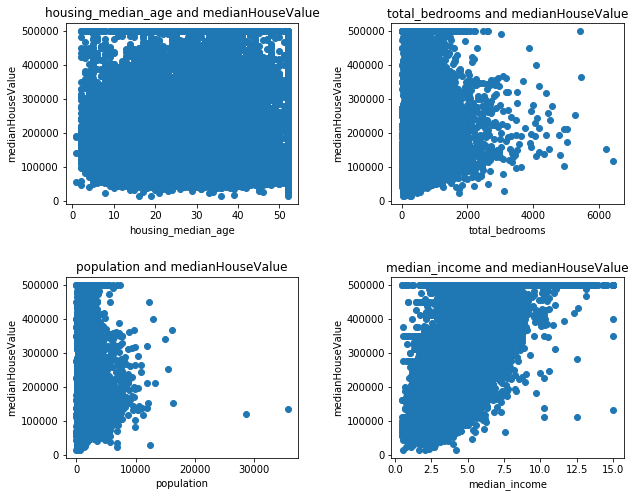

In [13]:
feature = ['housing_median_age', 'total_bedrooms','population','median_income'] 
fig,axes = plt.subplots(2, 2, figsize=(10,8)) 
fig.subplots_adjust(wspace=.4, hspace=.4)
for i in range(4):
    row, col = i // 2, i % 2 
    axes[row][col].scatter(data[feature[i]],data['median_house_value']) 
    axes[row][col].set_title(feature[i] + ' and medianHouseValue') 
    axes[row][col].set_xlabel(feature[i]) 
    axes[row][col].set_ylabel('medianHouseValue')
plt.show()

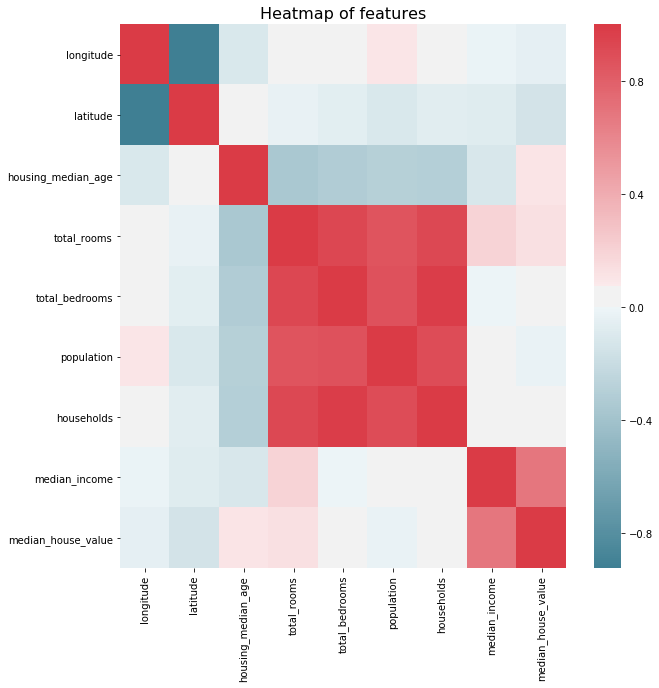

In [25]:
plt.subplots(figsize=(10,10))
plt.title("Heatmap of features",fontsize=16)
cmap = sns.diverging_palette(220, 10, as_cmap=True) 
sns.heatmap(data.corr(), cmap=cmap)
plt.show()

### Feature Engineering 
### Model building
#### Training-testing split & validation set

In [26]:
sample_size = len(data)
sample_size

20433

In [34]:
features = data.drop(['median_house_value'], axis = 1)
X_train = features[:sample_size -1000]
X_test = features[-1000:]
y_train = data['median_house_value'][:sample_size -1000] / 10000
y_test = data['median_house_value'][-1000:] / 10000

In [28]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
LR.coef_

array([-4.24484706e+00, -4.23349522e+00,  1.17809007e-01, -8.51647677e-04,
        1.12706590e-02, -3.88917383e-03,  5.16872592e-03,  4.05256199e+00])

In [30]:
LR.intercept_

-355.90279780055886

#### Make prediction

In [32]:
y_predict = LR.predict(X_test)

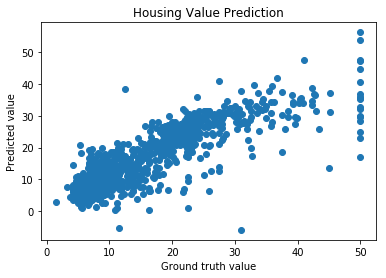

In [39]:
plt.plot(y_test, y_predict, 'o')
plt.title('Housing Value Prediction')
plt.xlabel('Ground truth value')
plt.ylabel('Predicted value')
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('RMSE: '+ str(np.sqrt(mean_squared_error(y_test, y_predict))))
print('R2: '+ str(r2_score(y_test, y_predict)))

RMSE: 5.519622343925925
R2: 0.7007300057290324
